<a href="https://colab.research.google.com/github/Sansanthoshh/coders-cave/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [39]:
drive = "/content/drive/MyDrive/Colab Notebooks/ speech emotion recognition/AudioWAV"

In [40]:
drive_directory_list = os.listdir(drive)

file_emotion = []
file_path = []

for file in drive_directory_list:

    file_path.append(drive + file)

    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
drive_df = pd.concat([emotion_df, path_df], axis=1)
drive_df.head()

,Emotions,Path
0,fear,/content/drive/MyDrive/Colab Notebooks/ speech...
1,angry,/content/drive/MyDrive/Colab Notebooks/ speech...
2,angry,/content/drive/MyDrive/Colab Notebooks/ speech...
3,disgust,/content/drive/MyDrive/Colab Notebooks/ speech...
4,sad,/content/drive/MyDrive/Colab Notebooks/ speech...


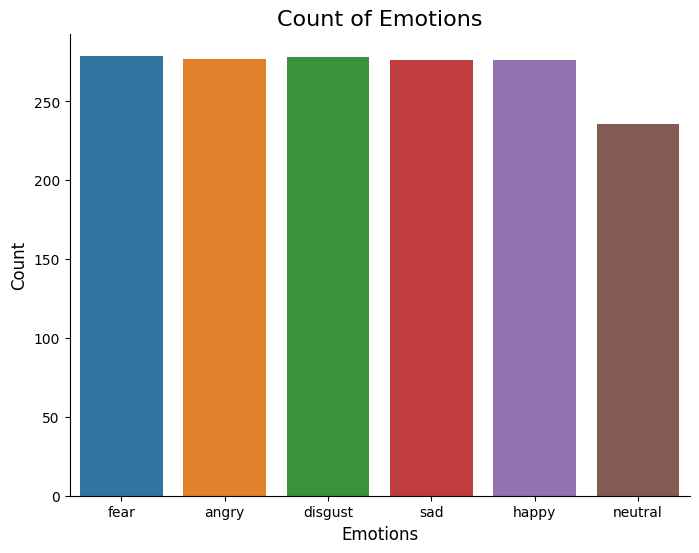

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Emotions' is a column in it

plt.figure(figsize=(8, 6))
plt.title('Count of Emotions', size=16)

# Specify 'data' parameter to indicate which DataFrame to use
sns.countplot(data=drive_df, x='Emotions')

plt.ylabel('Count', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.xlabel('Emotions', size=12)

plt.show()

In [35]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [73]:
emotion = 'angry'
filtered_paths = drive_df.Path[drive_df.Emotions == emotion]
if len(filtered_paths) > 0:
    path = np.array(filtered_paths)[0]
    data, sampling_rate = librosa.load(path)
    create_waveplot(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)
    Audio(path)
else:
    print(f"No entries found with emotion '{emotion}'")


No entries found with emotion 'angry'


In [55]:
labels = {'disgust':0,'happy':1,'sad':2,'neutral':3,'fear':4,'angry':5}
drive_df.replace({'Emotions':labels},inplace=True)


In [ ]:
num_mfcc=13
n_fft=2048
hop_length=512
SAMPLE_RATE = 22050
data = {
        "labels": [],
        "mfcc": []
    }
for i in range(7442):
    data['labels'].append(Crema_df.iloc[i,0])
    signal, sample_rate = librosa.load(Crema_df.iloc[i,1], sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(signal, sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T
    data["mfcc"].append(np.asarray(mfcc))
    if i%500==0:
           print(i)

In [74]:
X = np.asarray(data['mfcc'])
y = np.asarray(data["labels"])

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)


In [ ]:
print(X_train.shape,y_train.shape,X_validation.shape,y_validation.shape,X_test.shape,y_test.shape)

In [ ]:
def build_model(input_shape):
    model = tf.keras.Sequential()

    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(64))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(6, activation='softmax'))

    return model

In [ ]:
input_shape = (None,13)
model = build_model(input_shape)

# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: ",test_acc)

Test Accuracy:  0.563758373260498

In [ ]:
model.save('Speech-Emotion-Recognition-Model.h5)